# Bellabeat Wellness Tracker Analysis

This project is being done as part of the Google Data Analytics capstone project. It serves as an example of the skills that have been learned during the entire course.

During this project data will be collected, prepared, processed and analyzed. Visualizations will be created, conclusions from the data will be determined and insights will be presented to potential stakeholders.

## Background

Bellabeat is a fitness tracker company marketed towards women. These fitness trackers collect a large amount of data, which it is believed can be used to assist in a new marketing strategy.

We are being tasked to analyze data from these fitness trackers, and determine the following:

* What trends exist in smart device usage?
* How can these trends apply to Bellabeat customers?
* How can these trends influence Bellabeat's marketing strategy?

## Data Preparation

The data for this exercise come from [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit), a dataset available on Kaggle which contains data from 30 Fitbit users.

The documentation for what exactly each column in the dataset means can be found [here](https://www.fitabase.com/media/1930/fitabasedatadictionary102320.pdf)

The data for this dataset was obtained by consenting users and is available freely under the public domain.

This data is believed to be credible and contain no bias.

The data sources that we will be looking at will be:

* **minuteStepsNarrow_merged.csv**: The number of steps moved on a minute by minute basis.

* **minuteCaloriesNarrow_merged.csv**: The estimated number of calories expended on a minute by minute basis.

* **heartrate_seconds_merged.csv**: The heart rate measured at a given time.

* **minuteIntensitiesNarrow_merged.csv**: The intensity level on a minute by minute basis.

* **minuteMETsNarrow_merged.csv**: The [Metabolic equivalent](https://www.kaggle.com/datasets/arashnic/fitbit/discussion/254740) on a minute by minute basis.

* **minuteSleep_merged.csv**: The sleep state of a person on a minute by minute basis.

* **weightLogInfo_merged.csv**: The weight of a person on a given day.

## Data Processing

For this exercise, Python will be used to process the data. It has a wide range of tools for working with and validating datasets (`Pandas`) and creating visualizations (`Seaborn`).

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Validating  & Processing Data

Data validation will be done on each dataset. This process will involve checking to see if any values contain null values or any other outliers (negative values where there shouldn't be, invalid dates, etc)

Data processing will involve applying named categories to columns where it is needed and formatting dates and times so the data can be organized more clearly.

#### Processing Routines

Below are the routines that are used to process the dataframes.

In [2]:
def format_datetime(df: pd.DataFrame, datetime_col="datetime") -> pd.DataFrame:
    """Converts the elements of the `datetime_col` column of a DataFrame from a string into a datetime object

    Args:
        df (pd.DataFrame): The DataFrame to work on
        datetime_col (str, optional): The name of the column containing datetime information. Defaults to "datetime".

    Returns:
        pd.DataFrame: The modified DataFrame
    """
    datetime_series = pd.to_datetime(df[datetime_col], format=r"%m/%d/%Y %I:%M:%S %p")
    df = df.drop(datetime_col, axis=1)
    df.insert(1, datetime_col, datetime_series)
    return df

In [3]:
def get_date(df: pd.DataFrame, datetime_col="datetime", new_col='date') -> pd.DataFrame:
    """Adds a new date column to a DataFrame

    Args:
        df (pd.DataFrame): The DataFrame to work on
        datetime_col (str, optional): The name of the datetime column. Defaults to "datetime".
        new_col (str, optional): The name of the new date column. Defaults to 'date'.

    Returns:
        pd.DataFrame: The modified DataFrame
    """
    date_series = df[datetime_col].apply(lambda x: x.date())
    if new_col in df:
        df = df.drop(new_col, axis=1)
    df.insert(
        len(df.columns),
        new_col,
        date_series
    )
    return df

In [4]:
def calc_day_of_week(df:pd.DataFrame, datetime_col="datetime", new_col="day_of_week") -> pd.DataFrame:
    """Adds a new day of the week column to the DataFrame

    Args:
        df (pd.DataFrame): The DataFrame to work on
        datetime_col (str, optional): The name of the datetime column. Defaults to "datetime".
        new_col (str, optional): The name of the new day of the week column. Defaults to "day_of_week".

    Returns:
        pd.DataFrame: The modified DataFrame
    """
    day_categories = [
        "Mon",
        "Tue",
        "Wed",
        "Thu",
        "Fri",
        "Sat",
        "Sun"
    ]
    if new_col in df:
        df = df.drop(new_col, axis=1)
    day_of_week_series = df[datetime_col].apply(lambda x: x.strftime("%a"))
    day_of_week_series = pd.Categorical(day_of_week_series, categories=day_categories)
    df.insert(
        len(df.columns),
        new_col,
        day_of_week_series
    )
    return df

In [5]:
def calc_weekday_or_weekend(df, day_of_week_col="day_of_week", new_col='weekday_or_weekend'):
    weekdays = [
        "Mon",
        "Tue",
        "Wed",
        "Thu",
        "Fri"
    ]
    weekends = [
        "Sat",
        "Sun"
    ]
    if new_col in df:
        df = df.drop(new_col, axis=1)
    def weekday_or_weekend(day):
        if day in weekdays:
            return "weekday"
        if day in weekends:
            return "weekend"
        return ""
    weekday_weekend_series = df[day_of_week_col].apply(lambda x: weekday_or_weekend(x))
    weekday_weekend_series = pd.Categorical(weekday_weekend_series, categories=['weekday', 'weekend'])
    df.insert(
        len(df.columns),
        new_col,
        weekday_weekend_series
    )
    return df

In [6]:
def calc_time_of_day(df, datetime_col="datetime", new_col='time_of_day'):
    time_categories = [
        "Morning",
        "Afternoon",
        "Evening",
        "Night"
    ]
    if new_col in df:
        df = df.drop(new_col, axis=1)
    def time_of_day(hour):
        if hour in range(0,6):
            return "Night"
        if hour in range(6, 12):
            return "Morning"
        if hour in range(12,18):
            return "Afternoon"
        if hour in range(18, 24):
            return "Evening"
        raise ValueError(f"Could not convert hour '{hour}' to time of day")
    time_of_day_series = df[datetime_col].apply(lambda x: time_of_day(x.hour))
    time_of_day_series = pd.Categorical(time_of_day_series, categories=time_categories)
    df.insert(
        len(df.columns),
        new_col,
        time_of_day_series
    )
    return df

#### Steps

In [7]:
steps = pd.read_csv(r"./data/minuteStepsNarrow_merged.csv")
steps.rename(columns={"ActivityMinute":"datetime"}, inplace=True)
steps = format_datetime(steps)
steps.head()

,Id,datetime,Steps
0,1503960366,2016-04-12 00:00:00,0
1,1503960366,2016-04-12 00:01:00,0
2,1503960366,2016-04-12 00:02:00,0
3,1503960366,2016-04-12 00:03:00,0
4,1503960366,2016-04-12 00:04:00,0


In [8]:
steps.isna().sum()

Id          0
datetime    0
Steps       0
dtype: int64

In [9]:
steps['datetime'].min()

Timestamp('2016-04-12 00:00:00')

In [10]:
steps['datetime'].max()

Timestamp('2016-05-12 15:59:00')

In [11]:
steps['Steps'].min()

0

In [12]:
steps['Steps'].max()

220

In [13]:
print(f"The number of users in this dataset is: {len(set(steps['Id']))}")

The number of users in this dataset is: 33


Step data appears valid:

* No rows contain null values
* `ActivityMinute` contains valid values
* `Steps` contains no negative values 

#### Calories

In [14]:
calories = pd.read_csv(r"./data/minuteCaloriesNarrow_merged.csv")
calories.rename(columns={"ActivityMinute":"datetime"}, inplace=True)
calories = format_datetime(calories)
calories.head()

,Id,datetime,Calories
0,1503960366,2016-04-12 00:00:00,0.7865
1,1503960366,2016-04-12 00:01:00,0.7865
2,1503960366,2016-04-12 00:02:00,0.7865
3,1503960366,2016-04-12 00:03:00,0.7865
4,1503960366,2016-04-12 00:04:00,0.7865


In [15]:
calories.isna().sum()

Id          0
datetime    0
Calories    0
dtype: int64

In [16]:
calories['datetime'].min()

Timestamp('2016-04-12 00:00:00')

In [17]:
calories['datetime'].max()

Timestamp('2016-05-12 15:59:00')

In [18]:
calories['Calories'].min()

0.0

In [19]:
calories['Calories'].max()

19.7499465942383

In [20]:
print(f"The number of users in this dataset is: {len(set(calories['Id']))}")

The number of users in this dataset is: 33


Calorie data appears valid:

* No rows contain null values
* `ActivityMinute` contains reasonable values
* `Calories` contains no negative values

#### Heart Rate

In [21]:
heart_rate = pd.read_csv(r"./data/heartrate_seconds_merged.csv")
heart_rate.rename(columns={"Time":"datetime"}, inplace=True)
heart_rate = format_datetime(heart_rate, datetime_col="datetime")
heart_rate.head()

,Id,datetime,Value
0,2022484408,2016-04-12 07:21:00,97
1,2022484408,2016-04-12 07:21:05,102
2,2022484408,2016-04-12 07:21:10,105
3,2022484408,2016-04-12 07:21:20,103
4,2022484408,2016-04-12 07:21:25,101


In [22]:
heart_rate.isna().sum()

Id          0
datetime    0
Value       0
dtype: int64

In [23]:
heart_rate['datetime'].min()

Timestamp('2016-04-12 00:00:00')

In [24]:
heart_rate['datetime'].max()

Timestamp('2016-05-12 16:20:00')

In [25]:
heart_rate['Value'].min()

36

In [26]:
heart_rate['Value'].max()

203

In [27]:
print(f"The number of users in this dataset is: {len(set(heart_rate['Id']))}")

The number of users in this dataset is: 14


Heart Rate data appears valid:

* No rows contain null values.
* `Time` data appears valid.
* `Value` contains no zero or lower numbers.

*The max and min values for* `Value` *are both high and low for exercise and sleep, but not outside of reasonability*

#### Intensity

In [28]:
intensity = pd.read_csv(r"./data/minuteIntensitiesNarrow_merged.csv")
intensity_map = {
    0: 'Sedentary',
    1: 'Light',
    2: 'Moderate',
    3: 'Very Active' 
}

intensity['intensity_name'] = intensity['Intensity'].map(intensity_map)
intensity['intensity_name'] = intensity['intensity_name'].astype("category")
intensity.rename(columns={"ActivityMinute":"datetime"}, inplace=True)
intensity = format_datetime(intensity)
intensity.head()

,Id,datetime,Intensity,intensity_name
0,1503960366,2016-04-12 00:00:00,0,Sedentary
1,1503960366,2016-04-12 00:01:00,0,Sedentary
2,1503960366,2016-04-12 00:02:00,0,Sedentary
3,1503960366,2016-04-12 00:03:00,0,Sedentary
4,1503960366,2016-04-12 00:04:00,0,Sedentary


In [29]:
intensity.isna().sum()

Id                0
datetime          0
Intensity         0
intensity_name    0
dtype: int64

In [30]:
intensity['datetime'].min()

Timestamp('2016-04-12 00:00:00')

In [31]:
intensity['datetime'].max()

Timestamp('2016-05-12 15:59:00')

In [32]:
intensity['Intensity'].min()

0

In [33]:
intensity['Intensity'].max()

3

*Note that according to [the documentation](https://www.fitabase.com/media/1930/fitabasedatadictionary102320.pdf) the values for intensity range from 0 - 3*

In [34]:
print(f"The number of users in this dataset is: {len(set(intensity['Id']))}")

The number of users in this dataset is: 33


The Intensity data appears valid:

* No rows contain null values.
* `ActivityMinute` values appear valid.
* `Intensity` values exist within the valid range.

#### METs

In [35]:
mets = pd.read_csv(r"./data/minuteMETsNarrow_merged.csv")
mets.rename(columns={"ActivityMinute":"datetime"}, inplace=True)
mets = format_datetime(mets)
mets.head()

,Id,datetime,METs
0,1503960366,2016-04-12 00:00:00,10
1,1503960366,2016-04-12 00:01:00,10
2,1503960366,2016-04-12 00:02:00,10
3,1503960366,2016-04-12 00:03:00,10
4,1503960366,2016-04-12 00:04:00,10


*Note that according to [this source](https://www.kaggle.com/datasets/arashnic/fitbit/discussion/254740) true METs values need to be divided by 10*

In [36]:
mets['true_mets'] = (mets['METs']/10)
mets.head()

,Id,datetime,METs,true_mets
0,1503960366,2016-04-12 00:00:00,10,1.0
1,1503960366,2016-04-12 00:01:00,10,1.0
2,1503960366,2016-04-12 00:02:00,10,1.0
3,1503960366,2016-04-12 00:03:00,10,1.0
4,1503960366,2016-04-12 00:04:00,10,1.0


In [37]:
mets.isna().sum()

Id           0
datetime     0
METs         0
true_mets    0
dtype: int64

In [38]:
mets['datetime'].min()

Timestamp('2016-04-12 00:00:00')

In [39]:
mets['datetime'].max()

Timestamp('2016-05-12 15:59:00')

In [40]:
mets['true_mets'].min()

0.0

In [41]:
print(f"Rows with invalid true_mets values: = {mets.query('true_mets < 1').shape[0]}")

Rows with invalid true_mets values: = 8


In [42]:
mets = mets.query("true_mets >= 1")

In [43]:
mets['true_mets'].min()

1.0

In [44]:
print(f"Rows with invalid true_mets values: = {mets.query('true_mets < 1').shape[0]}")

Rows with invalid true_mets values: = 0


In [45]:
mets['true_mets'].max()

15.7

In [46]:
print(f"The number of users in this dataset is: {len(set(mets['Id']))}")

The number of users in this dataset is: 33


Errors were found in the METs data. 8 rows were discovered with `true_mets` values less than `1`. Since the METs at rest should be `1` these entries were considered erroneous and were removed.

After these values were removed, the rest of the data appeared fine:

* No rows contained null values.
* `ActivityMinute` values were all vaild.
* After cleaning, `true_mets` values were all acceptable.

*A METs value of 15 is high, however jump rope as an activity has a METs value of 12, so it is not outside the realm of possibility*.

#### Sleep

In [47]:
sleep = pd.read_csv(r"./data/minuteSleep_merged.csv")
sleep_map = {
    1: "asleep",
    2: "restless",
    3: "awake"
}
sleep['type'] = sleep["value"].map(sleep_map)
sleep['type'] = sleep['type'].astype("category")
sleep = sleep.rename(columns={"date":"datetime"})
sleep = format_datetime(sleep )
sleep.head()

,Id,datetime,value,logId,type
0,1503960366,2016-04-12 02:47:30,3,11380564589,awake
1,1503960366,2016-04-12 02:48:30,2,11380564589,restless
2,1503960366,2016-04-12 02:49:30,1,11380564589,asleep
3,1503960366,2016-04-12 02:50:30,1,11380564589,asleep
4,1503960366,2016-04-12 02:51:30,1,11380564589,asleep


In [48]:
sleep.isna().sum()

Id          0
datetime    0
value       0
logId       0
type        0
dtype: int64

In [49]:
sleep['datetime'].min()

Timestamp('2016-04-11 20:48:00')

In [50]:
sleep['datetime'].max()

Timestamp('2016-05-12 09:56:00')

In [51]:
sleep['value'].min()

1

In [52]:
sleep['value'].max()

3

*Note that [the documentation](https://www.fitabase.com/media/1930/fitabasedatadictionary102320.pdf) describes what each `value` represents*

In [53]:
print(f"The number of users in this dataset is: {len(set(sleep['Id']))}")

The number of users in this dataset is: 24


The sleep data appears valid:

* No rows contain null values.
* `date` contains valid values.
* `value` contains values within acceptable range.

#### Weight

In [54]:
def bmi_group(bmi):
    if bmi < 18.5:
        return "underweight"
    elif bmi >= 18.5 and bmi < 25:
        return "normal"
    elif bmi >= 25 and bmi < 30:
        return "overweight"
    elif bmi >= 30 and bmi < 40:
        return "obese"
    else:
        return "extremely_obese"

weight = pd.read_csv(r"./data/weightLogInfo_merged.csv")
weight['bmi_group'] = weight['BMI'].apply(bmi_group)
weight['bmi_group'] = pd.Categorical(weight['bmi_group'], categories=["underweight", "normal", "overweight", "obese", "extremely_obese"], ordered=True)
weight = weight.rename(columns={"Date":"datetime"})
weight = format_datetime(weight)
weight.head()

,Id,datetime,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,bmi_group
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000,normal
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000,normal
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000,extremely_obese
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000,normal
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000,normal


The parameters to assign a `bmi_group` to a `bmi` from [here](https://www.builtlean.com/bmi-chart/)

In [55]:
weight.isna().sum()

Id                 0
datetime           0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
bmi_group          0
dtype: int64

In [56]:
print(f"Number of entries in this dataset are: {weight.shape[0]}")

Number of entries in this dataset are: 67


Null values exist in `Fat` column of our dataset. And since 65 of the 67 rows are null, there is no point in keeping that column in our analysis.

In [57]:
weight = weight.drop(['Fat'], axis=1)
weight.isna().sum()

Id                0
datetime          0
WeightKg          0
WeightPounds      0
BMI               0
IsManualReport    0
LogId             0
bmi_group         0
dtype: int64

In [58]:
weight['datetime'].min()

Timestamp('2016-04-12 06:47:11')

In [59]:
weight['datetime'].max()

Timestamp('2016-05-12 23:59:59')

In [60]:
weight['WeightPounds'].min()

115.963146545323

In [61]:
weight['WeightPounds'].max()

294.317120016975

In [62]:
weight['BMI'].min()

21.4500007629395

In [63]:
weight['BMI'].max()

47.5400009155273

In [64]:
print(f"The number of users in this dataset is: {len(set(weight['Id']))}")

The number of users in this dataset is: 8


The weight data appears valid:

* Null values were found in most entries of the `Fat` column, so that column was dropped. No other Null values were found.

* All `Date` values are valid.

* The `WeightPounds` data contains reasonable values; nothing too low or too high. We will not be using `WeightKg` in our analysis.

* The `BMI` values are valid.

## Analysis

### Weights of Users Over Time

In [65]:
weight.head()

,Id,datetime,WeightKg,WeightPounds,BMI,IsManualReport,LogId,bmi_group
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.650000,True,1462233599000,normal
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,22.650000,True,1462319999000,normal
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,47.540001,False,1460509732000,extremely_obese
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,21.450001,True,1461283199000,normal
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,21.690001,True,1463097599000,normal


<Axes: xlabel='datetime', ylabel='WeightPounds'>

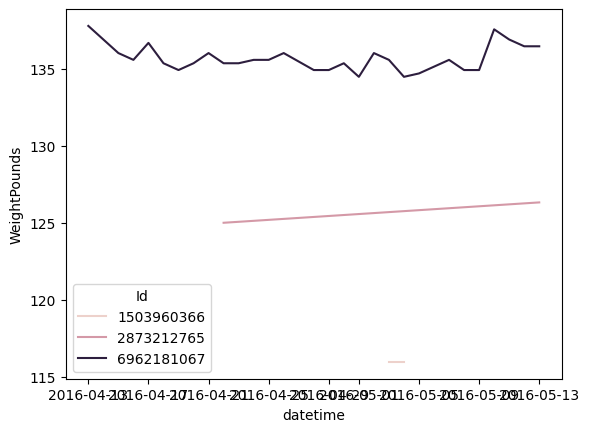

In [66]:
sns.lineplot(
    data=weight.query("bmi_group == 'normal'"),
    y='WeightPounds',
    x="datetime",
    hue='Id'
)

<Axes: xlabel='datetime', ylabel='WeightPounds'>

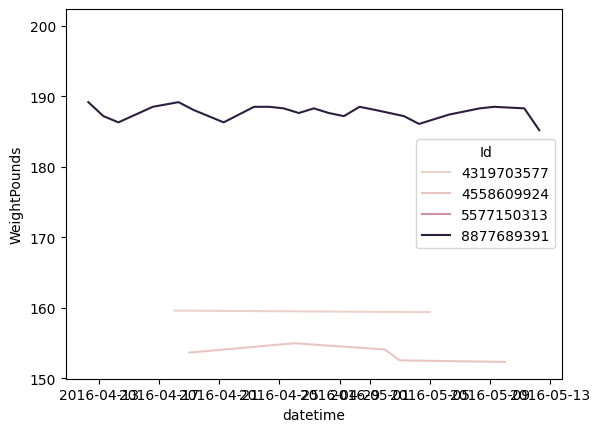

In [67]:
sns.lineplot(
    data=weight.query("bmi_group == 'overweight'"),
    y='WeightPounds',
    x="datetime",
    hue='Id'
)

### BMI as a Health Metric

The assumption that we will be looking to be made is that users with lower BMI exercise more. They will have more steps, have fewer sedentary moments, more moderate or very active moments, and will have higher METs rates. We will also examine how good their sleep is and their heart rate.

We will start off by looking at our `weights` dataset and see how many `body_type` groups there are.

In [68]:
print("The different body types in our weight dataset are:")
for bmi_group in set(weight['bmi_group']):
    print(f"   * {bmi_group}")

The different body types in our weight dataset are:
   * extremely_obese
   * normal
   * overweight


In [69]:
normal_weight_users = set(weight.query("bmi_group == 'normal'")['Id'])
print(f"The number of normal body type users are: {len(normal_weight_users)}")

The number of normal body type users are: 3


In [70]:
overweight_users = set(weight.query("bmi_group == 'overweight'")['Id'])
print(f"The number of overweight users are: {len(overweight_users)}")

The number of overweight users are: 4


In [71]:
extremely_obese_users = set(weight.query("bmi_group == 'extremely_obese'")['Id'])
print(f"The number of extremely obese users are: {len(extremely_obese_users)}")

The number of extremely obese users are: 1


Since we only have one user in the extremely obese category we will not include that in our findings. One user is too small of a sample size. In reality, 3 and 4 users is also too small, but we will mention that in the "future work" portion of this report.

For now, we will only perform analysis on the normal and overweight body type groups.

In [72]:
def calc_bmi_group(df, bmi_group_col='bmi_group'):
    if bmi_group_col in df:
        df = df.drop(bmi_group_col, axis=1)
    def bmi_from_user(user):
        if user in normal_weight_users:
            return "normal"
        if user in overweight_users:
            return "overweight"
        raise Exception(f"user '{user}' not found in user lists")
    bmi_group_series = df['Id'].apply(lambda x:bmi_from_user(x))
    df.insert(len(df.columns), bmi_group_col, bmi_group_series)
    df[bmi_group_col] = pd.Categorical(df[bmi_group_col], categories=['normal', 'overweight'], ordered=True)
    return df

### Daily Steps by BMI Group

In [73]:
bmi_steps = steps.query("Id in @normal_weight_users or Id in @overweight_users")
bmi_steps

,Id,datetime,Steps
0,1503960366,2016-04-12 00:00:00,0
1,1503960366,2016-04-12 00:01:00,0
2,1503960366,2016-04-12 00:02:00,0
3,1503960366,2016-04-12 00:03:00,0
4,1503960366,2016-04-12 00:04:00,0
...,...,...,...
1325575,8877689391,2016-05-12 13:55:00,0
1325576,8877689391,2016-05-12 13:56:00,0
1325577,8877689391,2016-05-12 13:57:00,0
1325578,8877689391,2016-05-12 13:58:00,0


In [74]:
daily_bmi_steps = get_date(bmi_steps)
daily_bmi_steps = daily_bmi_steps.groupby(['Id', 'date']).sum(numeric_only=True)
daily_bmi_steps = daily_bmi_steps.reset_index()
daily_bmi_steps = calc_bmi_group(daily_bmi_steps)
daily_bmi_steps.head()

,Id,date,Steps,bmi_group
0,1503960366,2016-04-12,13158,normal
1,1503960366,2016-04-13,10735,normal
2,1503960366,2016-04-14,10460,normal
3,1503960366,2016-04-15,9685,normal
4,1503960366,2016-04-16,12669,normal


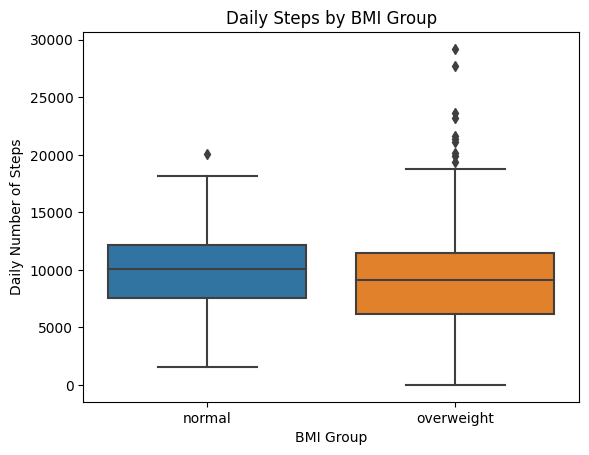

In [75]:
sns.boxplot(
    data=daily_bmi_steps,
    y="Steps",
    x="bmi_group"
).set(
    title="Daily Steps by BMI Group",
    xlabel="BMI Group",
    ylabel="Daily Number of Steps"
)
plt.show()

In [76]:
total_days = (bmi_steps['datetime'].max() - bmi_steps['datetime'].min()).days

In [77]:
bmi_steps_time = calc_time_of_day(bmi_steps)
bmi_steps_time = bmi_steps_time.groupby(['Id', 'time_of_day']).sum(numeric_only=True)
bmi_steps_time = bmi_steps_time.reset_index()
bmi_steps_time = bmi_steps_time.rename(columns={'Steps':'total_steps'})
bmi_steps_time['steps_daily'] = bmi_steps_time['total_steps'] / total_days

bmi_steps_time = calc_bmi_group(bmi_steps_time)
bmi_steps_time.head()

,Id,time_of_day,total_steps,steps_daily,bmi_group
0,1503960366,Morning,67627,2254.233333,normal
1,1503960366,Afternoon,111080,3702.666667,normal
2,1503960366,Evening,188660,6288.666667,normal
3,1503960366,Night,7179,239.300000,normal
4,2873212765,Morning,124318,4143.933333,normal


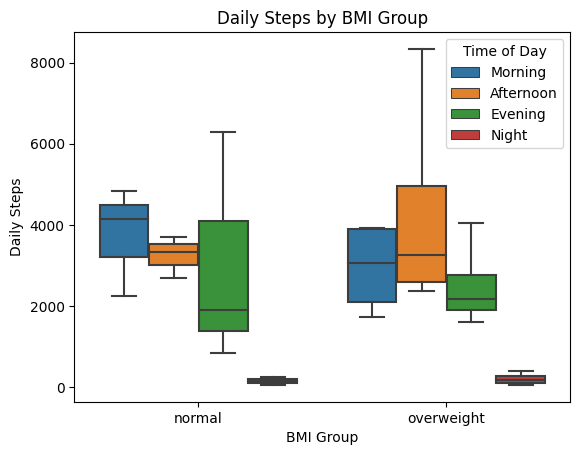

In [78]:
sns.boxplot(
    data=bmi_steps_time,
    x="bmi_group",
    y="steps_daily",
    hue="time_of_day"
).set(
    title="Daily Steps by BMI Group",
    xlabel='BMI Group',
    ylabel="Daily Steps",
)
plt.legend(title="Time of Day")
plt.show()

In [79]:
days = pd.DataFrame(
    daily_bmi_steps['date'].unique(),
    columns=['date']
)
days = calc_day_of_week(days, datetime_col="date")
days = days.value_counts("day_of_week")
days = pd.DataFrame(days, columns=['frequency'])
days = days.reset_index()
days

,day_of_week,frequency
0,Tue,5
1,Wed,5
2,Thu,5
3,Mon,4
4,Fri,4
5,Sat,4
6,Sun,4


In [80]:
day_week_bmi_steps = calc_day_of_week(bmi_steps)
day_week_bmi_steps = calc_weekday_or_weekend(day_week_bmi_steps)
day_week_bmi_steps = day_week_bmi_steps.groupby(['Id', 'day_of_week']).sum(numeric_only=True)
day_week_bmi_steps = day_week_bmi_steps.reset_index()
day_week_bmi_steps.head(7)

,Id,day_of_week,Steps
0,1503960366,Mon,55106
1,1503960366,Tue,69729
2,1503960366,Wed,62394
3,1503960366,Thu,47417
4,1503960366,Fri,45789
5,1503960366,Sat,53705
6,1503960366,Sun,40406


In [81]:
day_week_bmi_steps = day_week_bmi_steps.merge(right=days, on='day_of_week', how='left')
day_week_bmi_steps['daily_steps'] = day_week_bmi_steps['Steps'] / day_week_bmi_steps['frequency']
day_week_bmi_steps.head(7)

,Id,day_of_week,Steps,frequency,daily_steps
0,1503960366,Mon,55106,4,13776.50
1,1503960366,Tue,69729,5,13945.80
2,1503960366,Wed,62394,5,12478.80
3,1503960366,Thu,47417,5,9483.40
4,1503960366,Fri,45789,4,11447.25
5,1503960366,Sat,53705,4,13426.25
6,1503960366,Sun,40406,4,10101.50


In [82]:
day_week_bmi_steps = calc_bmi_group(day_week_bmi_steps)
day_week_bmi_steps.head(7)

,Id,day_of_week,Steps,frequency,daily_steps,bmi_group
0,1503960366,Mon,55106,4,13776.50,normal
1,1503960366,Tue,69729,5,13945.80,normal
2,1503960366,Wed,62394,5,12478.80,normal
3,1503960366,Thu,47417,5,9483.40,normal
4,1503960366,Fri,45789,4,11447.25,normal
5,1503960366,Sat,53705,4,13426.25,normal
6,1503960366,Sun,40406,4,10101.50,normal


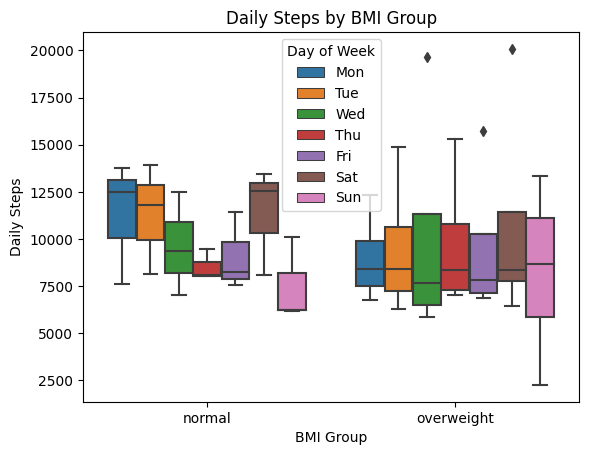

In [83]:
sns.boxplot(
    data=day_week_bmi_steps,
    y='daily_steps',
    x='bmi_group',
    hue='day_of_week'
).set(
    title="Daily Steps by BMI Group",
    ylabel='Daily Steps',
    xlabel="BMI Group"
)
plt.legend(title="Day of Week")
plt.show()

### Intensity by BMI Group

In [84]:
bmi_intensity = intensity.query("Id in @normal_weight_users or Id in @overweight_users")
bmi_intensity

,Id,datetime,Intensity,intensity_name
0,1503960366,2016-04-12 00:00:00,0,Sedentary
1,1503960366,2016-04-12 00:01:00,0,Sedentary
2,1503960366,2016-04-12 00:02:00,0,Sedentary
3,1503960366,2016-04-12 00:03:00,0,Sedentary
4,1503960366,2016-04-12 00:04:00,0,Sedentary
...,...,...,...,...
1325575,8877689391,2016-05-12 13:55:00,0,Sedentary
1325576,8877689391,2016-05-12 13:56:00,0,Sedentary
1325577,8877689391,2016-05-12 13:57:00,0,Sedentary
1325578,8877689391,2016-05-12 13:58:00,0,Sedentary


In [85]:
total_days = (bmi_intensity['datetime'].max() - bmi_intensity['datetime'].min()).days
total_days

30

In [86]:
bmi_intensity_minutes = bmi_intensity.groupby(['Id', 'intensity_name']).count()
bmi_intensity_minutes = bmi_intensity_minutes.drop('datetime', axis=1)
bmi_intensity_minutes = bmi_intensity_minutes.reset_index()
bmi_intensity_minutes = bmi_intensity_minutes.rename(columns={'Intensity':'minutes'})
bmi_intensity_minutes['hours'] = bmi_intensity_minutes['minutes'] / (60)
bmi_intensity_minutes['hours_per_day'] = bmi_intensity_minutes['hours'] / total_days
bmi_intensity_minutes = calc_bmi_group(bmi_intensity_minutes)
bmi_intensity_minutes.head(4)

,Id,intensity_name,minutes,hours,hours_per_day,bmi_group
0,1503960366,Light,6806,113.433333,3.781111,normal
1,1503960366,Moderate,594,9.900000,0.330000,normal
2,1503960366,Sedentary,34420,573.666667,19.122222,normal
3,1503960366,Very Active,1200,20.000000,0.666667,normal


In [87]:
bmi_intensity_minutes = bmi_intensity_minutes.query("intensity_name != 'Sedentary'")
bmi_intensity_minutes['intensity_name'] = pd.Categorical(bmi_intensity_minutes['intensity_name'], categories=['Light', 'Moderate', 'Very Active'], ordered=True)

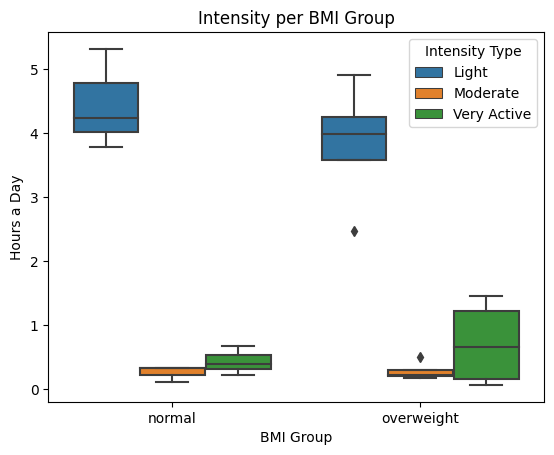

In [88]:
sns.boxplot(
    data=bmi_intensity_minutes,
    x="bmi_group",
    y='hours_per_day',
    hue='intensity_name'
).set(
    title='Intensity per BMI Group',
    ylabel='Hours a Day',
    xlabel='BMI Group'
)
plt.legend(title='Intensity Type')
plt.show()

In [89]:
bmi_intensity_times = calc_time_of_day(bmi_intensity)
bmi_intensity_times = bmi_intensity_times.groupby(['Id','time_of_day', 'intensity_name', ]).count()
bmi_intensity_times = bmi_intensity_times.drop('datetime', axis=1)
bmi_intensity_times = bmi_intensity_times.reset_index()
bmi_intensity_times = bmi_intensity_times.rename(columns={'Intensity':'minutes'})
bmi_intensity_times['hours'] = bmi_intensity_times['minutes'] / (60)
bmi_intensity_times['hours_per_day'] = bmi_intensity_times['hours'] / total_days
bmi_intensity_times = calc_bmi_group(bmi_intensity_times)
bmi_intensity_times.head(16)

,Id,time_of_day,intensity_name,minutes,hours,hours_per_day,bmi_group
0,1503960366,Morning,Light,1753,29.216667,0.973889,normal
1,1503960366,Morning,Moderate,43,0.716667,0.023889,normal
2,1503960366,Morning,Sedentary,8955,149.250000,4.975000,normal
3,1503960366,Morning,Very Active,49,0.816667,0.027222,normal
4,1503960366,Afternoon,Light,2199,36.650000,1.221667,normal
5,1503960366,Afternoon,Moderate,166,2.766667,0.092222,normal
6,1503960366,Afternoon,Sedentary,8107,135.116667,4.503889,normal
7,1503960366,Afternoon,Very Active,328,5.466667,0.182222,normal
8,1503960366,Evening,Light,2433,40.550000,1.351667,normal
9,1503960366,Evening,Moderate,384,6.400000,0.213333,normal


In [90]:
bmi_intensity_times = bmi_intensity_times.query("intensity_name != 'Sedentary'")
bmi_intensity_times['intensity_name'] = pd.Categorical(bmi_intensity_times['intensity_name'], categories=['Light', 'Moderate', 'Very Active'], ordered=True)

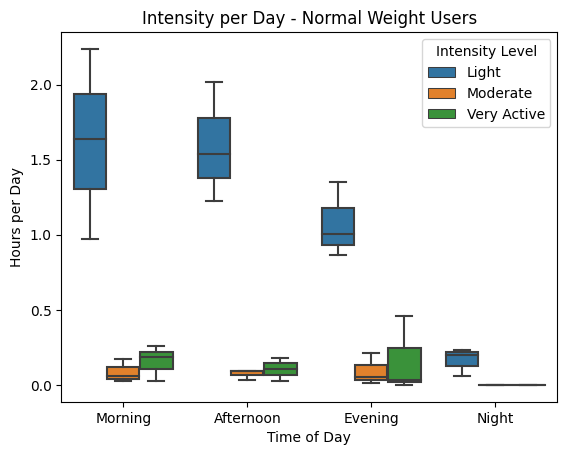

In [91]:
sns.boxplot(
    data=bmi_intensity_times.query("bmi_group == 'normal'"),
    y='hours_per_day',
    x='time_of_day',
    hue='intensity_name'
).set(
    title='Intensity per Day - Normal Weight Users',
    xlabel="Time of Day",
    ylabel="Hours per Day",
)
plt.legend(title='Intensity Level')

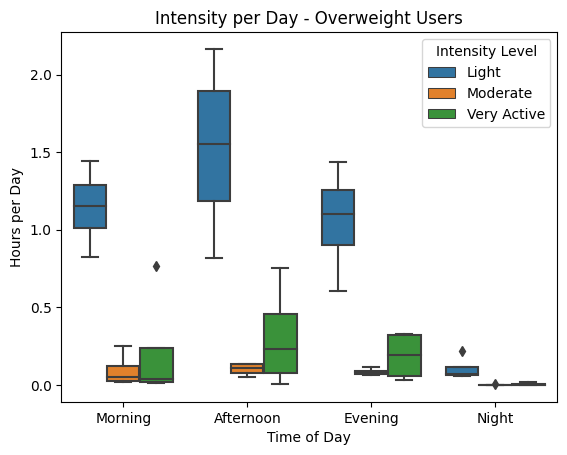

In [92]:
sns.boxplot(
    data=bmi_intensity_times.query("bmi_group == 'overweight'"),
    y='hours_per_day',
    x='time_of_day',
    hue='intensity_name'
).set(
    title='Intensity per Day - Overweight Users',
    xlabel="Time of Day",
    ylabel="Hours per Day",
)
plt.legend(title='Intensity Level')
plt.show()

In [93]:
bmi_intensity_week = calc_day_of_week(bmi_intensity)
bmi_intensity_week = bmi_intensity_week.groupby(['Id','day_of_week', 'intensity_name', ]).count()
bmi_intensity_week = bmi_intensity_week.drop('datetime', axis=1)
bmi_intensity_week = bmi_intensity_week.reset_index()
bmi_intensity_week = bmi_intensity_week.rename(columns={'Intensity':'minutes'})
bmi_intensity_week['hours'] = bmi_intensity_week['minutes'] / (60)

days = pd.DataFrame(
    get_date(bmi_intensity)['date'].unique(),
    columns=['date']
)
days = calc_day_of_week(days, datetime_col='date')
days = days.value_counts(['day_of_week'])
days = pd.DataFrame(days, columns=['frequency'])
days = days.reset_index()

bmi_intensity_week = bmi_intensity_week.merge(right=days, on='day_of_week', how='left')
bmi_intensity_week['hours_per_day'] = bmi_intensity_week['hours'] / bmi_intensity_week['frequency']

bmi_intensity_week = calc_bmi_group(bmi_intensity_week)
bmi_intensity_week.head()

,Id,day_of_week,intensity_name,minutes,time_of_day,hours,frequency,hours_per_day,bmi_group
0,1503960366,Mon,Light,932,932,15.533333,4,3.883333,normal
1,1503960366,Mon,Moderate,56,56,0.933333,4,0.233333,normal
2,1503960366,Mon,Sedentary,4570,4570,76.166667,4,19.041667,normal
3,1503960366,Mon,Very Active,202,202,3.366667,4,0.841667,normal
4,1503960366,Tue,Light,1339,1339,22.316667,5,4.463333,normal


In [94]:
bmi_intensity_week = bmi_intensity_week.query("intensity_name != 'Sedentary'")
bmi_intensity_week['intensity_name'] = pd.Categorical(bmi_intensity_week['intensity_name'], categories=['Light', 'Moderate', 'Very Active'], ordered=True)

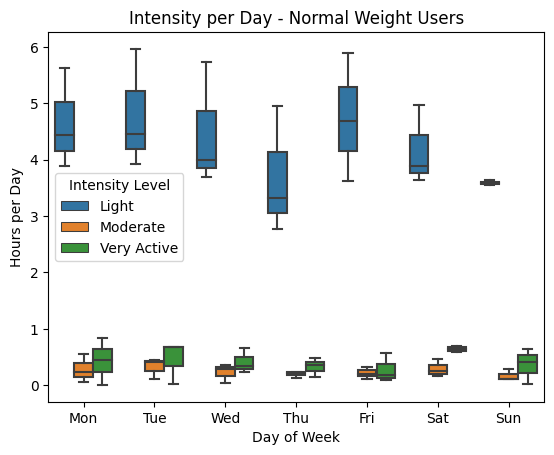

In [95]:
sns.boxplot(
    data=bmi_intensity_week.query("bmi_group == 'normal'"),
    y='hours_per_day',
    x='day_of_week',
    hue='intensity_name'
).set(
    title='Intensity per Day - Normal Weight Users',
    xlabel="Day of Week",
    ylabel="Hours per Day",
)
plt.legend(title='Intensity Level')
plt.show()

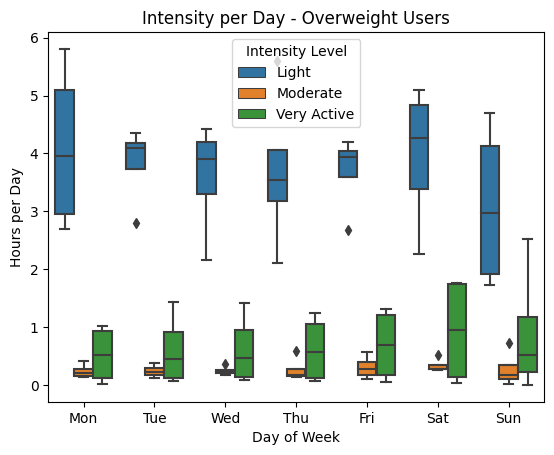

In [96]:
sns.boxplot(
    data=bmi_intensity_week.query("bmi_group == 'overweight'"),
    y='hours_per_day',
    x='day_of_week',
    hue='intensity_name'
).set(
    title='Intensity per Day - Overweight Users',
    xlabel="Day of Week",
    ylabel="Hours per Day",
)
plt.legend(title='Intensity Level')
plt.show()

### Sleep by BMI Group

In [97]:
bmi_sleep = sleep.query("Id in @normal_weight_users or Id in @overweight_users")
bmi_sleep = bmi_sleep.drop(['value', 'logId'], axis=1)

In [98]:
bmi_sleep_base = bmi_sleep.groupby(['Id', 'type']).count()
bmi_sleep_base = bmi_sleep_base.reset_index()
bmi_sleep_base = bmi_sleep_base.rename(columns={"datetime":"minutes"})
bmi_sleep_base['hours'] = bmi_sleep_base['minutes'] / 60
total_days = (sleep['datetime'].max() - sleep['datetime'].min()).days
bmi_sleep_base['hours_per_day'] = bmi_sleep_base['hours'] / total_days
bmi_sleep_base = calc_bmi_group(bmi_sleep_base)
bmi_sleep_base.head()

,Id,type,minutes,hours,hours_per_day,bmi_group
0,1503960366,asleep,9007,150.116667,5.003889,normal
1,1503960366,awake,73,1.216667,0.040556,normal
2,1503960366,restless,500,8.333333,0.277778,normal
3,4319703577,asleep,12393,206.550000,6.885000,overweight
4,4319703577,awake,85,1.416667,0.047222,overweight


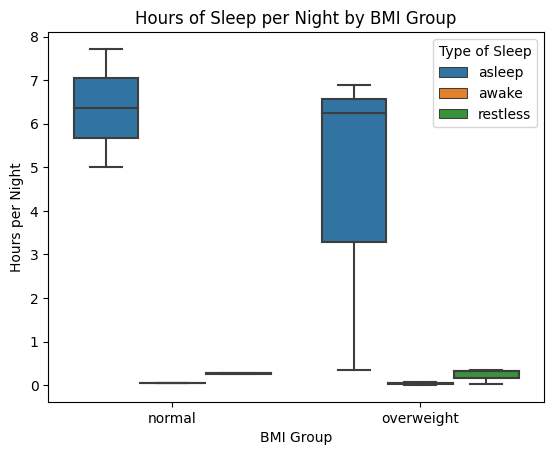

In [99]:
sns.boxplot(
    data=bmi_sleep_base,
    y='hours_per_day',
    x='bmi_group',
    hue='type'
).set(
    title='Hours of Sleep per Night by BMI Group',
    xlabel="BMI Group",
    ylabel="Hours per Night",
)
plt.legend(title="Type of Sleep")
plt.show()

In [100]:
bmi_sleep_times = calc_time_of_day(bmi_sleep)
bmi_sleep_times = bmi_sleep_times.groupby(['Id', 'time_of_day', 'type']).count()
bmi_sleep_times = bmi_sleep_times.reset_index()
bmi_sleep_times = bmi_sleep_times.rename(columns={"datetime":"minutes"})
bmi_sleep_times['hours'] = bmi_sleep_times['minutes'] / 60
total_days = (sleep['datetime'].max() - sleep['datetime'].min()).days
bmi_sleep_times['hours_per_day'] = bmi_sleep_times['hours'] / total_days
bmi_sleep_times = calc_bmi_group(bmi_sleep_times)
bmi_sleep_times.head(12)

,Id,time_of_day,type,minutes,hours,hours_per_day,bmi_group
0,1503960366,Morning,asleep,3683,61.383333,2.046111,normal
1,1503960366,Morning,awake,36,0.600000,0.020000,normal
2,1503960366,Morning,restless,355,5.916667,0.197222,normal
3,1503960366,Afternoon,asleep,0,0.000000,0.000000,normal
4,1503960366,Afternoon,awake,0,0.000000,0.000000,normal
5,1503960366,Afternoon,restless,0,0.000000,0.000000,normal
6,1503960366,Evening,asleep,126,2.100000,0.070000,normal
7,1503960366,Evening,awake,0,0.000000,0.000000,normal
8,1503960366,Evening,restless,1,0.016667,0.000556,normal
9,1503960366,Night,asleep,5198,86.633333,2.887778,normal


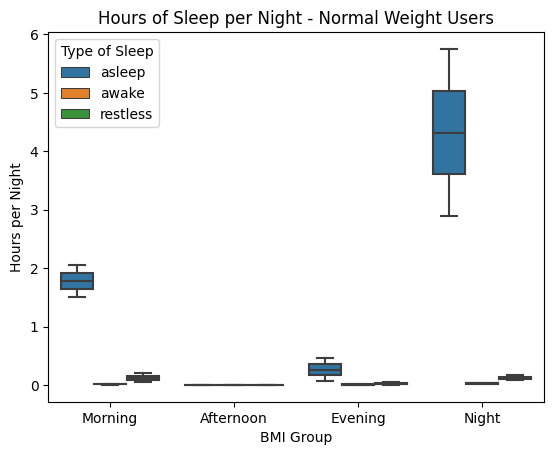

In [101]:
sns.boxplot(
    data=bmi_sleep_times.query("bmi_group == 'normal'"),
    y='hours_per_day',
    x='time_of_day',
    hue='type'
).set(
    title='Hours of Sleep per Night - Normal Weight Users',
    xlabel="BMI Group",
    ylabel="Hours per Night",
)
plt.legend(title="Type of Sleep")
plt.show()

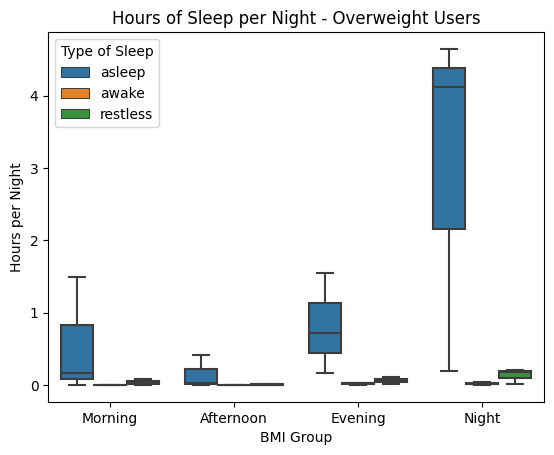

In [102]:
sns.boxplot(
    data=bmi_sleep_times.query("bmi_group == 'overweight'"),
    y='hours_per_day',
    x='time_of_day',
    hue='type'
).set(
    title='Hours of Sleep per Night - Overweight Users',
    xlabel="BMI Group",
    ylabel="Hours per Night",
)
plt.legend(title="Type of Sleep")
plt.show()

In [103]:
bmi_sleep_days = calc_day_of_week(bmi_sleep)
bmi_sleep_days = bmi_sleep_days.groupby(['Id', 'day_of_week', 'type']).count()
bmi_sleep_days = bmi_sleep_days.reset_index()
bmi_sleep_days = bmi_sleep_days.rename(columns={"datetime":"minutes"})
bmi_sleep_days['hours'] = bmi_sleep_days['minutes'] / 60
total_days = (sleep['datetime'].max() - sleep['datetime'].min()).days

days = pd.DataFrame(
    get_date(bmi_sleep)['date'].unique(),
    columns=['date']
)
days = calc_day_of_week(days, datetime_col='date')
days = days.value_counts(['day_of_week'])
days = pd.DataFrame(days, columns=['frequency'])
days = days.reset_index()

bmi_sleep_days = bmi_sleep_days.merge(right=days, on='day_of_week', how='left')
bmi_sleep_days['hours_per_day'] = bmi_sleep_days['hours'] / bmi_sleep_days['frequency']

bmi_sleep_days = calc_bmi_group(bmi_sleep_days)
bmi_sleep_days.head(21)

,Id,day_of_week,type,minutes,time_of_day,hours,frequency,hours_per_day,bmi_group
0,1503960366,Mon,asleep,892,892,14.866667,5,2.973333,normal
1,1503960366,Mon,awake,12,12,0.200000,5,0.040000,normal
2,1503960366,Mon,restless,70,70,1.166667,5,0.233333,normal
3,1503960366,Tue,asleep,1532,1532,25.533333,5,5.106667,normal
4,1503960366,Tue,awake,13,13,0.216667,5,0.043333,normal
5,1503960366,Tue,restless,94,94,1.566667,5,0.313333,normal
6,1503960366,Wed,asleep,1029,1029,17.150000,5,3.430000,normal
7,1503960366,Wed,awake,15,15,0.250000,5,0.050000,normal
8,1503960366,Wed,restless,46,46,0.766667,5,0.153333,normal
9,1503960366,Thu,asleep,938,938,15.633333,5,3.126667,normal


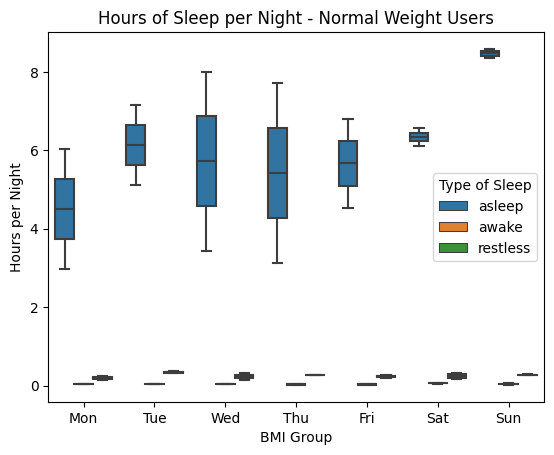

In [104]:
sns.boxplot(
    data=bmi_sleep_days.query("bmi_group == 'normal'"),
    y='hours_per_day',
    x='day_of_week',
    hue='type'
).set(
    title='Hours of Sleep per Night - Normal Weight Users',
    xlabel="BMI Group",
    ylabel="Hours per Night",
)
plt.legend(title="Type of Sleep")
plt.show()

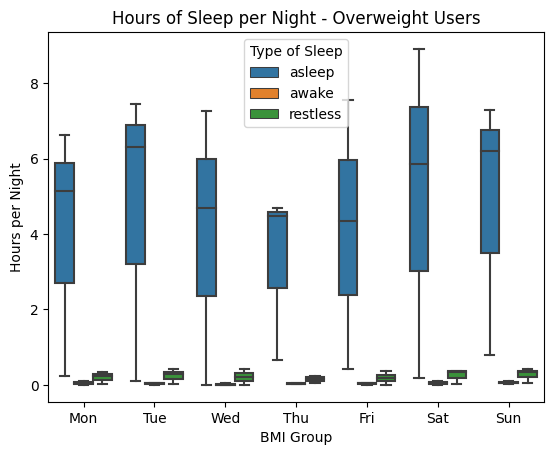

In [105]:
sns.boxplot(
    data=bmi_sleep_days.query("bmi_group == 'overweight'"),
    y='hours_per_day',
    x='day_of_week',
    hue='type'
).set(
    title='Hours of Sleep per Night - Overweight Users',
    xlabel="BMI Group",
    ylabel="Hours per Night",
)
plt.legend(title="Type of Sleep")
plt.show()

### Calories Expended by BMI Group

In [106]:
bmi_calories = calories.query("Id in @normal_weight_users or Id in @overweight_users")
bmi_calories.head()

,Id,datetime,Calories
0,1503960366,2016-04-12 00:00:00,0.7865
1,1503960366,2016-04-12 00:01:00,0.7865
2,1503960366,2016-04-12 00:02:00,0.7865
3,1503960366,2016-04-12 00:03:00,0.7865
4,1503960366,2016-04-12 00:04:00,0.7865


In [107]:
total_days = (bmi_calories['datetime'].max() - bmi_calories['datetime'].min()).days

In [108]:
bmi_calories_day = bmi_calories.drop(columns=['datetime'], axis=1)
bmi_calories_day = bmi_calories_day.groupby(['Id']).sum(numeric_only=True)
bmi_calories_day = bmi_calories_day.reset_index()
bmi_calories_day = bmi_calories_day.rename(columns={'Calories':'total_calories'})
bmi_calories_day['calories_per_day'] = bmi_calories_day['total_calories'] / total_days
bmi_calories_day = calc_bmi_group(bmi_calories_day)
bmi_calories_day.head()

,Id,total_calories,calories_per_day,bmi_group
0,1503960366,56289.869294,1876.328976,normal
1,2873212765,59112.441655,1970.414722,normal
2,4319703577,61831.525778,2061.050859,overweight
3,4558609924,62978.392994,2099.279766,overweight
4,5577150313,100811.100088,3360.370003,overweight


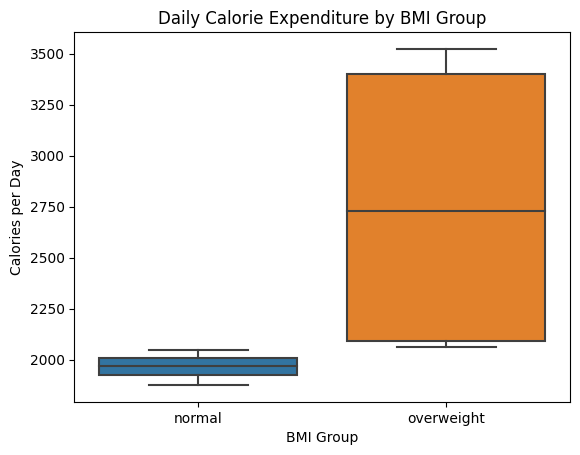

In [109]:
sns.boxplot(
    data=bmi_calories_day,
    y='calories_per_day',
    x='bmi_group'
).set(
    title="Daily Calorie Expenditure by BMI Group",
    xlabel="BMI Group",
    ylabel="Calories per Day"
)
plt.show()

In [110]:
bmi_calories_time = calc_time_of_day(bmi_calories)
bmi_calories_time = bmi_calories_time.drop(columns=['datetime'], axis=1)
bmi_calories_time = bmi_calories_time.groupby(['Id', 'time_of_day']).sum(numeric_only=True)
bmi_calories_time = bmi_calories_time.reset_index()
bmi_calories_time = bmi_calories_time.rename(columns={'Calories':'total_calories'})
bmi_calories_time['calories_per_day'] = bmi_calories_time['total_calories'] / total_days
bmi_calories_time = calc_bmi_group(bmi_calories_time)
bmi_calories_time.head()

,Id,time_of_day,total_calories,calories_per_day,bmi_group
0,1503960366,Morning,12868.494133,428.949804,normal
1,1503960366,Afternoon,15480.812056,516.027069,normal
2,1503960366,Evening,18666.368822,622.212294,normal
3,1503960366,Night,9274.194283,309.139809,normal
4,2873212765,Morning,20079.531935,669.317731,normal


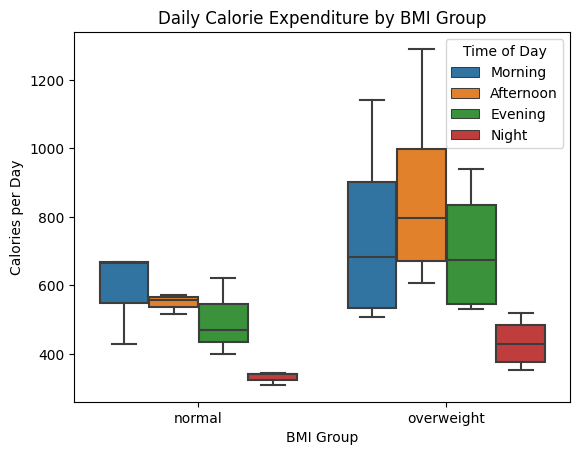

In [111]:
sns.boxplot(
    data=bmi_calories_time,
    y='calories_per_day',
    x='bmi_group',
    hue='time_of_day'
).set(
    title='Daily Calorie Expenditure by BMI Group',
    xlabel="BMI Group",
    ylabel="Calories per Day",
)
plt.legend(title="Time of Day")
plt.show()

In [112]:
bmi_calories_week = calc_day_of_week(bmi_calories)
bmi_calories_week = bmi_calories_week.drop(columns=['datetime'], axis=1)
bmi_calories_week = bmi_calories_week.groupby(['Id', 'day_of_week']).sum(numeric_only=True)
bmi_calories_week = bmi_calories_week.reset_index()
bmi_calories_week = bmi_calories_week.rename(columns={'Calories':'total_calories'})

days = pd.DataFrame(
    get_date(bmi_calories)['date'].unique(),
    columns=['date']
)
days = calc_day_of_week(days, datetime_col='date')
days = days.value_counts(['day_of_week'])
days = pd.DataFrame(days, columns=['frequency'])
days = days.reset_index()

bmi_calories_week = bmi_calories_week.merge(right=days, on='day_of_week', how='left')
bmi_calories_week['calories_per_day'] = bmi_calories_week['total_calories'] / bmi_calories_week['frequency']

bmi_calories_week = calc_bmi_group(bmi_calories_week)
bmi_calories_week.head(7)

,Id,day_of_week,total_calories,frequency,calories_per_day,bmi_group
0,1503960366,Mon,7772.348918,4,1943.087229,normal
1,1503960366,Tue,9841.905383,5,1968.381077,normal
2,1503960366,Wed,9286.362383,5,1857.272477,normal
3,1503960366,Thu,7410.902894,5,1482.180579,normal
4,1503960366,Fri,7307.497995,4,1826.874499,normal
5,1503960366,Sat,7582.083346,4,1895.520837,normal
6,1503960366,Sun,7088.768375,4,1772.192094,normal


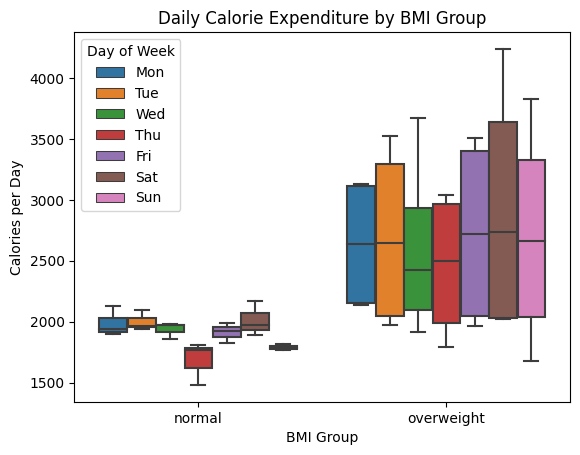

In [113]:
sns.boxplot(
    data=bmi_calories_week,
    y='calories_per_day',
    x='bmi_group',
    hue='day_of_week'
).set(
    title="Daily Calorie Expenditure by BMI Group",
    xlabel="BMI Group",
    ylabel="Calories per Day"
)
plt.legend(title="Day of Week")
plt.show()

### Heart Rate by BMI Group

In [114]:
bmi_heart_rate = heart_rate.query("Id in @normal_weight_users or Id in @overweight_users")
bmi_heart_rate = bmi_heart_rate.rename(columns={"Value":"heart_rate"})
bmi_heart_rate.head()

,Id,datetime,heart_rate
844486,4558609924,2016-04-12 06:44:30,91
844487,4558609924,2016-04-12 06:44:35,92
844488,4558609924,2016-04-12 06:44:45,90
844489,4558609924,2016-04-12 06:44:50,89
844490,4558609924,2016-04-12 06:45:00,90


In [115]:
total_days = (bmi_heart_rate['datetime'].max() - bmi_heart_rate['datetime'].min()).days
total_days

30

In [116]:
bmi_heart_rate.groupby(['Id']).count()

,datetime,heart_rate
Id,,
4558609924,192168,192168
5577150313,248560,248560
6962181067,266326,266326
8877689391,228841,228841


In [117]:
bmi_heart_rate_days = bmi_heart_rate.drop(["datetime"], axis=1)
bmi_heart_rate_days = bmi_heart_rate_days.groupby(['Id']).sum(numeric_only=True)
bmi_heart_rate_days = bmi_heart_rate_days.reset_index()
bmi_heart_rate_days['heart_rate_daily'] = bmi_heart_rate_days['heart_rate'] / (total_days*60*24*5)
bmi_heart_rate_days = calc_bmi_group(bmi_heart_rate_days)
bmi_heart_rate_days.head()

,Id,heart_rate,heart_rate_daily,bmi_group
0,4558609924,15695119,72.662588,overweight
1,5577150313,17290956,80.050722,overweight
2,6962181067,20699934,95.833028,normal
3,8877689391,19133667,88.581792,overweight


Processing this, we see we don't have enough statistics to draw any kind of conclusion for heart rate

### METs by BMI Group

In [118]:
bmi_mets = mets.query("Id in @normal_weight_users or Id in @overweight_users")
bmi_mets.head()

,Id,datetime,METs,true_mets
0,1503960366,2016-04-12 00:00:00,10,1.0
1,1503960366,2016-04-12 00:01:00,10,1.0
2,1503960366,2016-04-12 00:02:00,10,1.0
3,1503960366,2016-04-12 00:03:00,10,1.0
4,1503960366,2016-04-12 00:04:00,10,1.0


In [137]:
total_days = (bmi_mets['datetime'].max() - bmi_mets['datetime'].min()).days
bmi_mets_daily = bmi_mets.drop(['datetime','METs'], axis=1)
bmi_mets_daily = bmi_mets_daily.groupby("Id").sum(numeric_only=1).reset_index()
bmi_mets_daily = bmi_mets_daily.rename(columns={'true_mets':'total_mets'})
bmi_mets_daily['daily_mets'] = bmi_mets_daily['total_mets'] / total_days
bmi_mets_daily = calc_bmi_group(bmi_mets_daily)
bmi_mets_daily.head()

,Id,total_mets,daily_mets,bmi_group
0,1503960366,71708.1,2390.270000,normal
1,2873212765,67498.9,2249.963333,normal
2,4319703577,61176.1,2039.203333,overweight
3,4558609924,67786.6,2259.553333,overweight
4,5577150313,79617.1,2653.903333,overweight


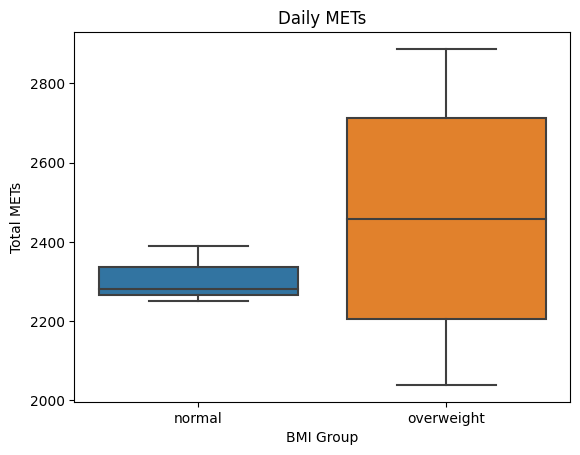

In [138]:
sns.boxplot(
    data=bmi_mets_daily,
    y='daily_mets',
    x='bmi_group'
).set(
    title='Daily METs',
    xlabel='BMI Group',
    ylabel='Total METs'
)
plt.show()

In [139]:
bmi_mets_times = calc_time_of_day(bmi_mets)
bmi_mets_times = bmi_mets_times.drop(['datetime', 'METs'], axis=1)
bmi_mets_times = bmi_mets_times.groupby(['Id', 'time_of_day']).sum(numeric_only=True).reset_index()
bmi_mets_times = bmi_mets_times.rename(columns={'true_mets':'total_mets'})
bmi_mets_times['daily_mets'] = bmi_mets_times['total_mets'] / total_days
bmi_mets_times = calc_bmi_group(bmi_mets_times)
bmi_mets_times.head()

,Id,time_of_day,total_mets,daily_mets,bmi_group
0,1503960366,Morning,16394.1,546.470000,normal
1,1503960366,Afternoon,19720.3,657.343333,normal
2,1503960366,Evening,23778.9,792.630000,normal
3,1503960366,Night,11814.8,393.826667,normal
4,2873212765,Morning,22928.1,764.270000,normal


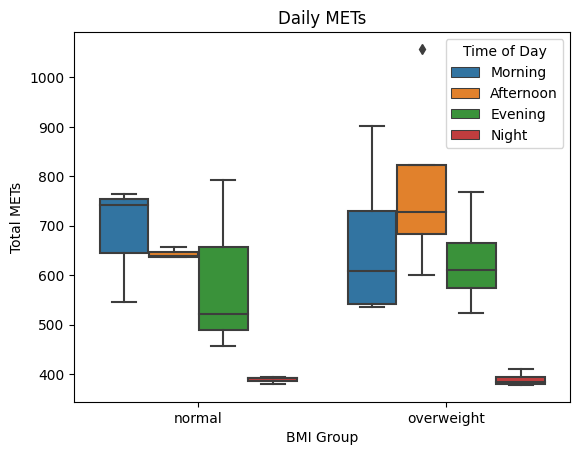

In [140]:
sns.boxplot(
    data=bmi_mets_times,
    x='bmi_group',
    y='daily_mets',
    hue='time_of_day'
).set(
    title='Daily METs',
    xlabel='BMI Group',
    ylabel='Total METs'
)
plt.legend(title='Time of Day')
plt.show()


In [145]:
bmi_mets_week = calc_day_of_week(bmi_mets)
bmi_mets_week = bmi_mets_week.drop(['datetime', 'METs'], axis=1)
bmi_mets_week = bmi_mets_week.groupby(['Id', 'day_of_week']).sum(numeric_only=True).reset_index()
bmi_mets_week = bmi_mets_week.rename(columns={'true_mets':'total_mets'})

days = pd.DataFrame(
    get_date(bmi_mets)['date'].unique(),
    columns=['date']
)
days = calc_day_of_week(days, datetime_col='date')
days = days.value_counts(['day_of_week'])
days = pd.DataFrame(days, columns=['frequency'])
days = days.reset_index()

bmi_mets_week = bmi_mets_week.merge(right=days, on='day_of_week', how='left')
bmi_mets_week['mets_per_day'] = bmi_mets_week['total_mets'] / bmi_mets_week['frequency']

bmi_mets_week = calc_bmi_group(bmi_mets_week)
bmi_mets_week.head()

,Id,day_of_week,total_mets,frequency,mets_per_day,bmi_group
0,1503960366,Mon,9897.3,4,2474.325,normal
1,1503960366,Tue,12545.5,5,2509.100,normal
2,1503960366,Wed,11836.6,5,2367.320,normal
3,1503960366,Thu,9438.9,5,1887.780,normal
4,1503960366,Fri,9306.9,4,2326.725,normal


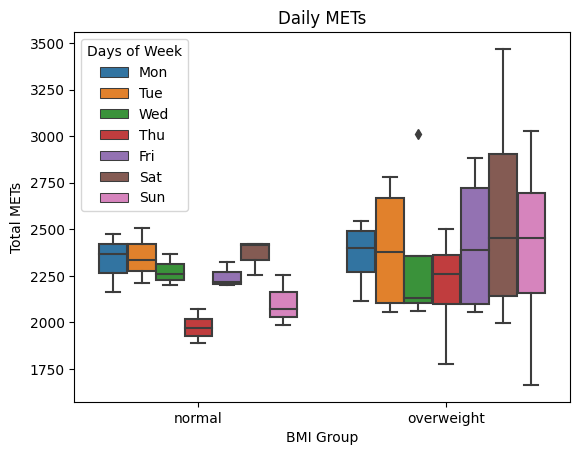

In [147]:
sns.boxplot(
    data=bmi_mets_week,
    x='bmi_group',
    y='mets_per_day',
    hue='day_of_week'
).set(
    title='Daily METs',
    xlabel='BMI Group',
    ylabel='Total METs',
)
plt.legend(title='Days of Week')
plt.show()